# Análise Exploratória de Dados - Despesas Militares Globais

Neste notebook, vamos explorar um conjunto de dados sobre despesas militares globais. Vamos analisar as tendências gerais, comparar diferentes países e regiões e lidar com valores ausentes.

## Importação das Bibliotecas

In [3]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy.stats import skew, kurtosis, norm, powerlaw
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation

In [4]:
import pandas as pd
# show all cols
#pd.set_option('display.max_columns', None)
# show full width of showing cols
#pd.set_option('display.width', None)
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be

## Carregamento dos Dados

In [5]:
# Load the data
df = pd.read_csv('military_expenditure_unpivoted.csv')

In [6]:
df.head()

,pais,ano,gasto
0,Africa,1949,NaN
1,North Africa,1949,NaN
2,Algeria,1949,NaN
3,Libya,1949,NaN
4,Morocco,1949,NaN


## Limpeza dos Dados

Aqui, vamos fazer a limpeza dos dados, lidar com valores ausentes e converter os tipos de dados conforme necessário.

In [7]:
def generate_eda_report(df):
    
    # Basic Data Information
    print("Data Information")
    print(df.info())
    print("\nFirst 5 records:\n", df.head())
    
    # Missing Values
    print("\nMissing Values")
    missing = df.isnull().sum()
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'missing_count': missing, 'percent_missing': percent_missing})
    print(missing_value_df)
    
    # Descriptive Statistics
    print("\nDescriptive Statistics")
    print("\nNumerical columns")
    print(df.describe())
    print("\nCategorical columns")
    print(df.describe(include=['O']))
    
    # Distribution of numerical columns
    print("\nDistribution of numerical columns")
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    for col in numerical_columns:
        print(f"\nColumn: {col}")
        print(f"Skew : {skew(df[col].dropna())}")
        print(f"Kurtosis : {kurtosis(df[col].dropna())}")
        #df[col].hist()
        #plt.show()
        
    # Cardinality of categorical columns
    print("\nCardinality of categorical columns")
    categorical_columns = df.select_dtypes(include=['O']).columns
    for col in categorical_columns:
        print(f"\nColumn: {col}")
        print(f"Unique values : {df[col].nunique()}")
        #df[col].value_counts().plot(kind='bar')
        #plt.show()

In [8]:
generate_eda_report(df)

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14208 entries, 0 to 14207
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    14208 non-null  object 
 1   ano     14208 non-null  int64  
 2   gasto   8491 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 333.1+ KB
None

First 5 records:
            pais   ano  gasto
0        Africa  1949    NaN
1  North Africa  1949    NaN
2       Algeria  1949    NaN
3         Libya  1949    NaN
4       Morocco  1949    NaN

Missing Values
       missing_count  percent_missing
pais               0         0.000000
ano                0         0.000000
gasto           5717        40.237894

Descriptive Statistics

Numerical columns
                ano          gasto
count  14208.000000    8491.000000
mean    1985.500000    6060.967428
std       21.360761   38176.955228
min     1949.000000       0.000000
25%     1967.000000      49.898169
50%    

In [9]:
# Número de países únicos
print("Número de países únicos:", df['pais'].nunique())

Número de países únicos: 192


In [10]:
# Países com mais dados ausentes na coluna 'gasto'
print("Países com mais dados ausentes na coluna 'gasto':")
print(df[df['gasto'].isnull()]['pais'].value_counts().head(10))

Países com mais dados ausentes na coluna 'gasto':
pais
Africa                               74
Central Europe                       74
Central America and the Caribbean    74
North America                        74
South America                        74
Asia & Oceania                       74
Oceania                              74
South Asia                           74
North Africa                         74
East Asia                            74
Name: count, dtype: int64


In [11]:
# Configurando o estilo
sns.set(style='whitegrid')

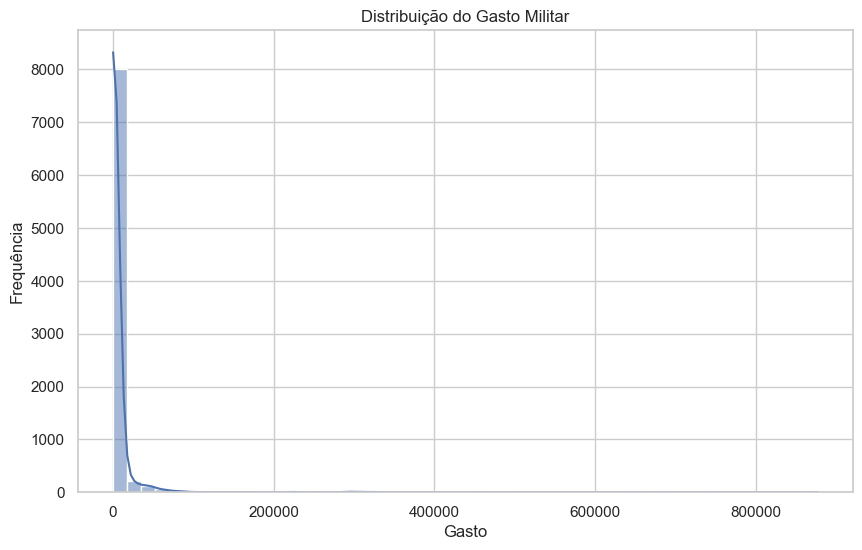

In [12]:
# Criando o histograma para a coluna 'gasto'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='gasto', bins=50, kde=True)
plt.title('Distribuição do Gasto Militar')
plt.xlabel('Gasto')
plt.ylabel('Frequência')
plt.show()

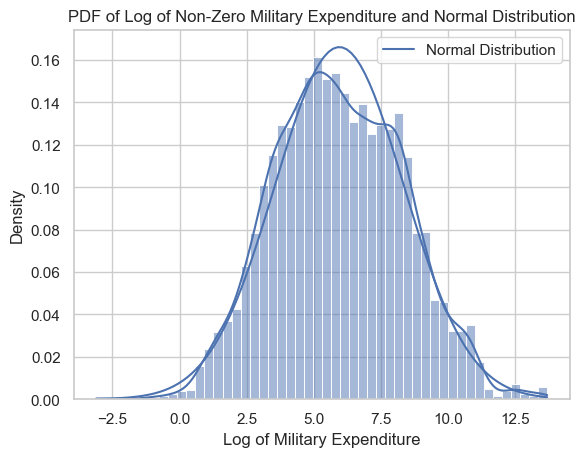

In [26]:
# Take the log of the non-zero military expenditure
log_military_expenditure = np.log(military_expenditure_non_zero)

# Calculate mean and standard deviation of the log-transformed military expenditures
mu, std = np.mean(log_military_expenditure), np.std(log_military_expenditure)

# Generate the x values for the normal distribution
x = np.linspace(log_military_expenditure.min(), log_military_expenditure.max(), 100)

# Generate the y values for the normal distribution
y = norm.pdf(x, mu, std)

# Plot the histogram and KDE of the log-transformed military expenditures
sns.histplot(log_military_expenditure, bins=50, kde=True, stat='density')

# Plot the normal distribution
plt.plot(x, y, label='Normal Distribution')

plt.title('PDF of Log of Non-Zero Military Expenditure and Normal Distribution')
plt.xlabel('Log of Military Expenditure')
plt.ylabel('Density')
plt.legend()
plt.show()

In [13]:
# Agrupando por ano e calculando o gasto militar total
gasto_por_ano = df.groupby('ano')['gasto'].sum()

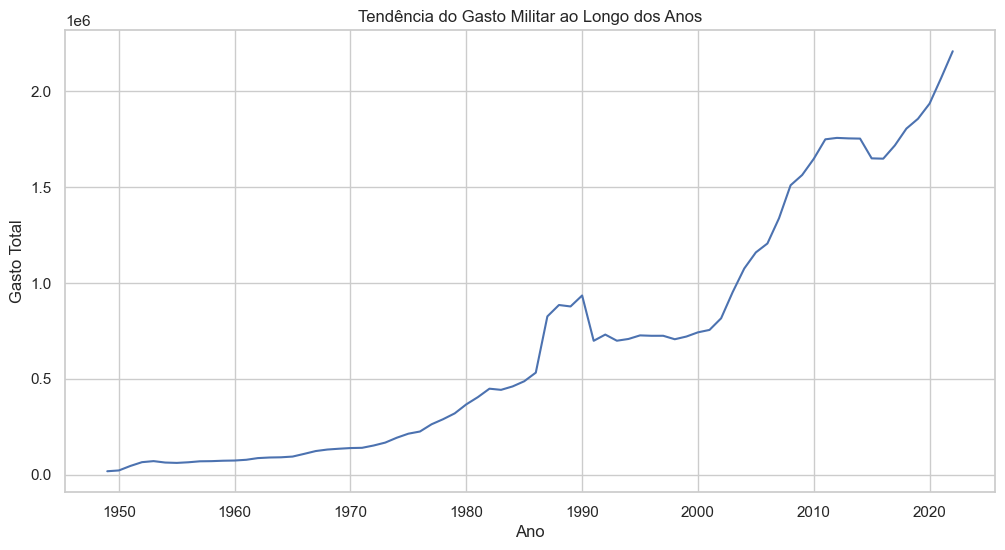

In [14]:
# Plotando a tendência do gasto militar ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(x=gasto_por_ano.index, y=gasto_por_ano.values)
plt.title('Tendência do Gasto Militar ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Gasto Total')
plt.show()

In [15]:
# Obtendo o último ano nos dados
ultimo_ano = df['ano'].max()

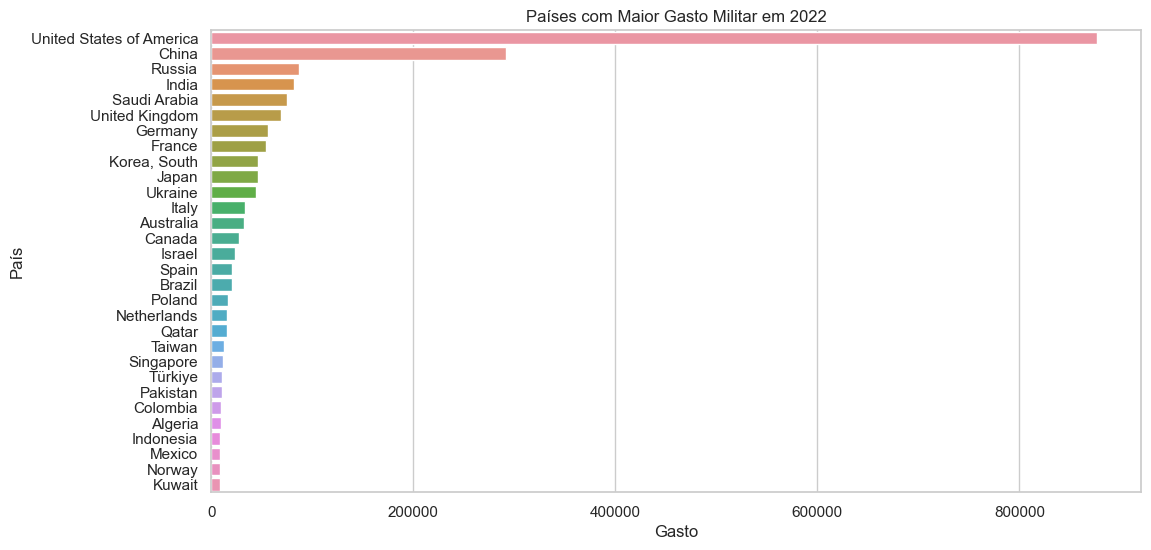

In [16]:
# Obtendo os países com maior gasto militar no último ano
paises_top = df[df['ano'] == ultimo_ano].nlargest(30, 'gasto')

# Plotando os países com maior gasto militar
plt.figure(figsize=(12, 6))
sns.barplot(x='gasto', y='pais', data=paises_top)
plt.title('Países com Maior Gasto Militar em ' + str(ultimo_ano))
plt.xlabel('Gasto')
plt.ylabel('País')
plt.show()

C:\Users\teodo\AppData\Local\Temp\ipykernel_33980\645323544.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


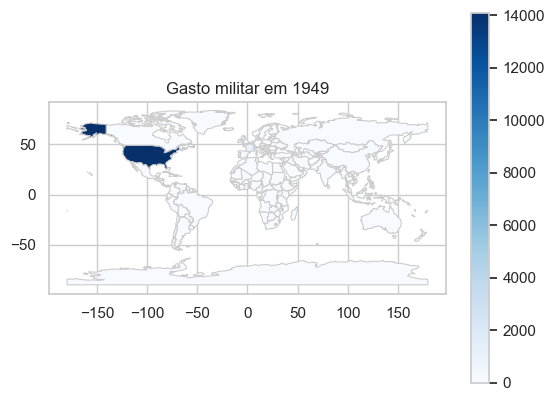

<Figure size 4500x3000 with 0 Axes>

In [17]:
# Remodelando os dados para que cada coluna represente um ano e cada linha represente um país
dados_reshaped = df.pivot(index='pais', columns='ano', values='gasto')

# Carregando o mapa do mundo
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fundindo o mapa do mundo e os dados
mundo = mundo.set_index('name').join(dados_reshaped)

# Plotando o gráfico mundial para um ano específico
ano = 1949  # substitua pelo ano de seu interesse
mundo[ano] = mundo[ano].fillna(0)  # preenchendo dados ausentes com 0
mundo.plot(column=ano, cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Gasto militar em ' + str(ano))
# Definindo o tamanho da figura
plt.figure(figsize=(15*3, 10*3))

plt.show()


C:\Users\teodo\AppData\Local\Temp\ipykernel_33980\2165600104.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


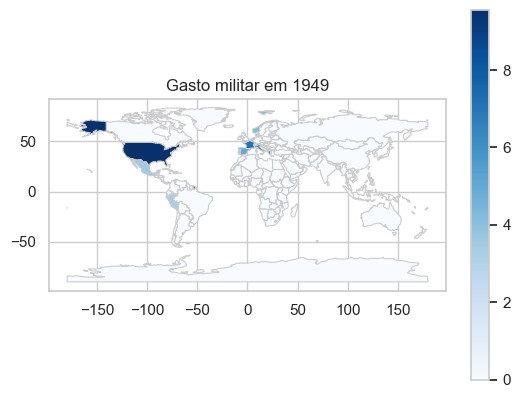

<Figure size 4500x3000 with 0 Axes>

In [18]:
# Remodelando os dados para que cada coluna represente um ano e cada linha represente um país
dados_reshaped = df.pivot(index='pais', columns='ano', values='gasto')
dados_reshaped = np.log1p(dados_reshaped)
# Carregando o mapa do mundo
mundo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fundindo o mapa do mundo e os dados
mundo = mundo.set_index('name').join(dados_reshaped)

# Plotando o gráfico mundial para um ano específico
ano = 1949  # substitua pelo ano de seu interesse
mundo[ano] = mundo[ano].fillna(0)  # preenchendo dados ausentes com 0
mundo.plot(column=ano, cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Gasto militar em ' + str(ano))
# Definindo o tamanho da figura
plt.figure(figsize=(15*3, 10*3))

plt.show()

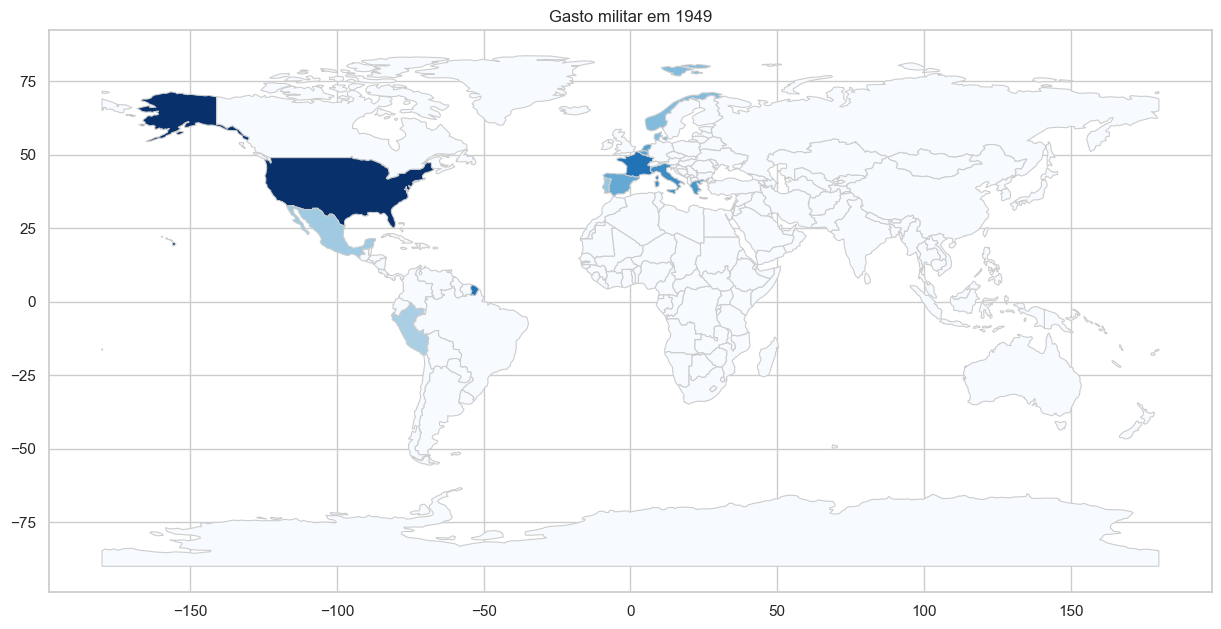

In [19]:
# Obtendo o intervalo de anos
anos = df['ano'].unique()

# Criando a figura
fig, ax = plt.subplots(figsize=(15, 10))


def draw_map(ano):
    # Limpar o gráfico
    ax.clear()

    # Preencher dados ausentes com 0 para o ano atual
    mundo[ano] = mundo[ano].fillna(0)
    #mundo[ano] = np.log1p(mundo[ano].fillna(0))

    # Desenhar o mapa
    mundo.plot(column=ano, cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=False, ax=ax)

    # Adicionar um título
    ax.set_title('Gasto militar em ' + str(ano))

# Criar a animação
ani = animation.FuncAnimation(fig, draw_map, frames=anos)

# Salvar a animação
ani.save('military_spending.gif', fps=1)

In [20]:
def prever_tendencia(pais, dados, anos_futuros=5):
    # Filtrando os dados para o país específico
    dados_pais = dados[dados['pais'] == pais].sort_values('ano')

    # Removendo valores nulos
    dados_pais = dados_pais.dropna()

    # Checando se há dados suficientes para o país
    if len(dados_pais) < 10:
        print(f"Não há dados suficientes para {pais}.")
        return None, None, None, None

    # Calculando a média móvel
    dados_pais['media_movel'] = dados_pais['gasto'].rolling(window=3).mean()

    # Regressão linear
    modelo_linear = LinearRegression()
    X = dados_pais['ano'].values.reshape(-1, 1)
    y = dados_pais['gasto'].values
    modelo_linear.fit(X, y)
    dados_pais['regressao_linear'] = modelo_linear.predict(X)

    # Previsões para os próximos anos com o modelo de regressão linear
    anos_futuros = np.arange(dados_pais['ano'].max()+1, dados_pais['ano'].max()+1+anos_futuros).reshape(-1, 1)
    previsoes_linear = modelo_linear.predict(anos_futuros)

    return dados_pais, anos_futuros, previsoes_linear



In [21]:
# Obtendo os 10 países com maior gasto militar no último ano
paises_top = df[df['ano'] == ultimo_ano].nlargest(20, 'gasto')['pais']

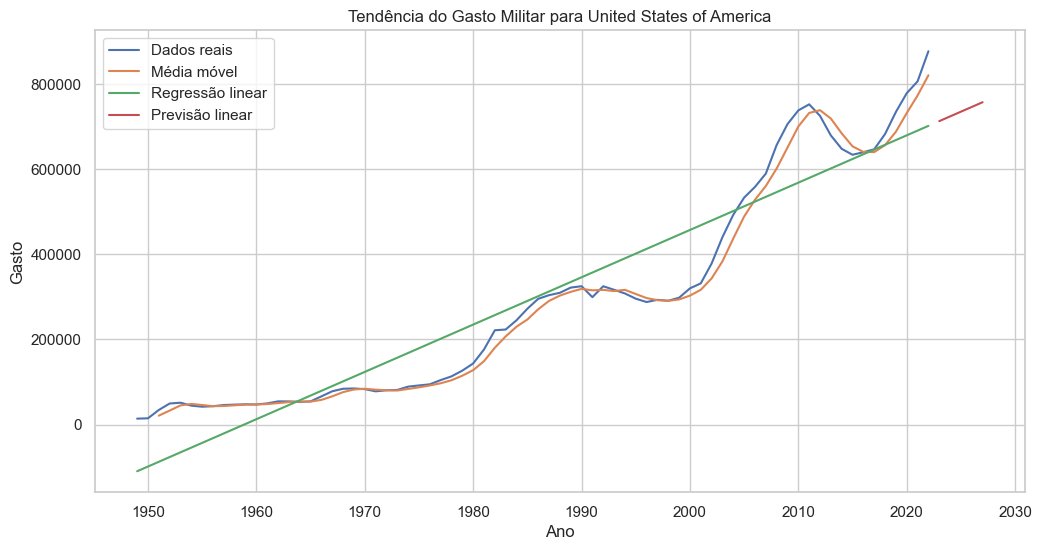

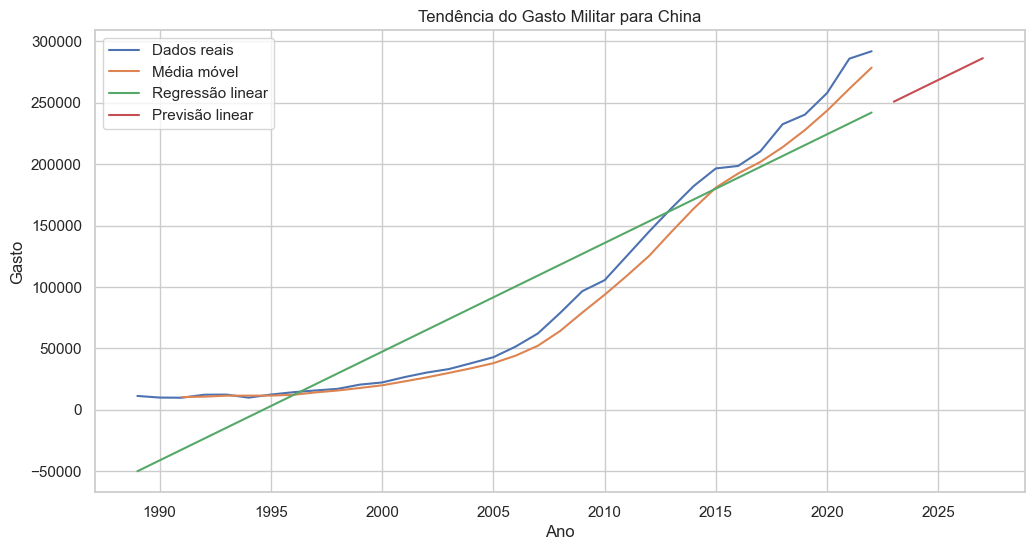

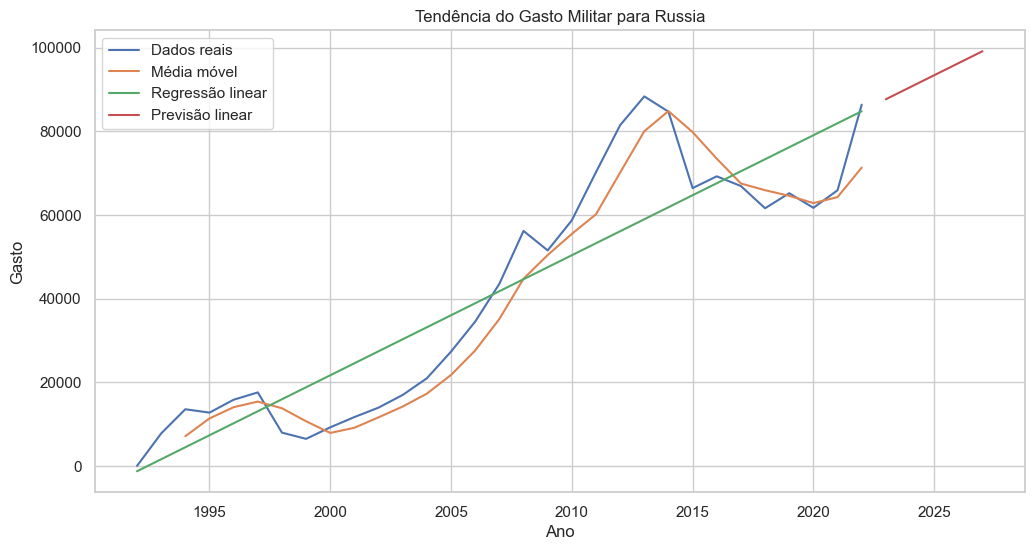

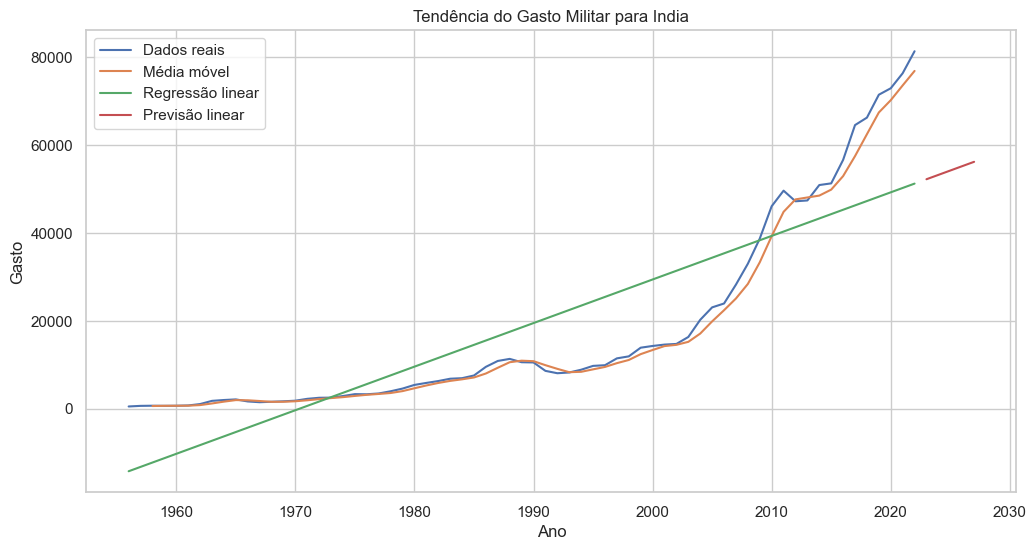

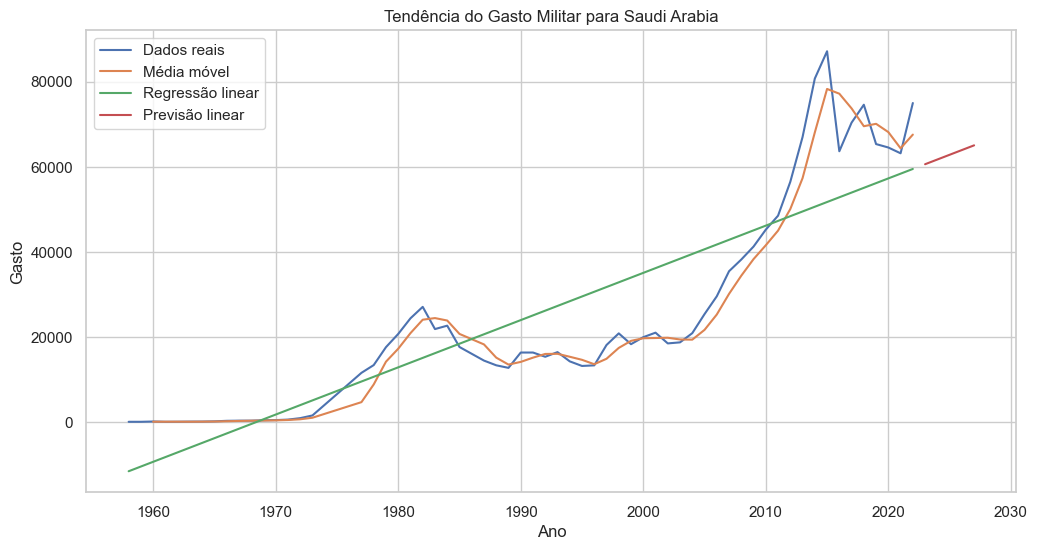

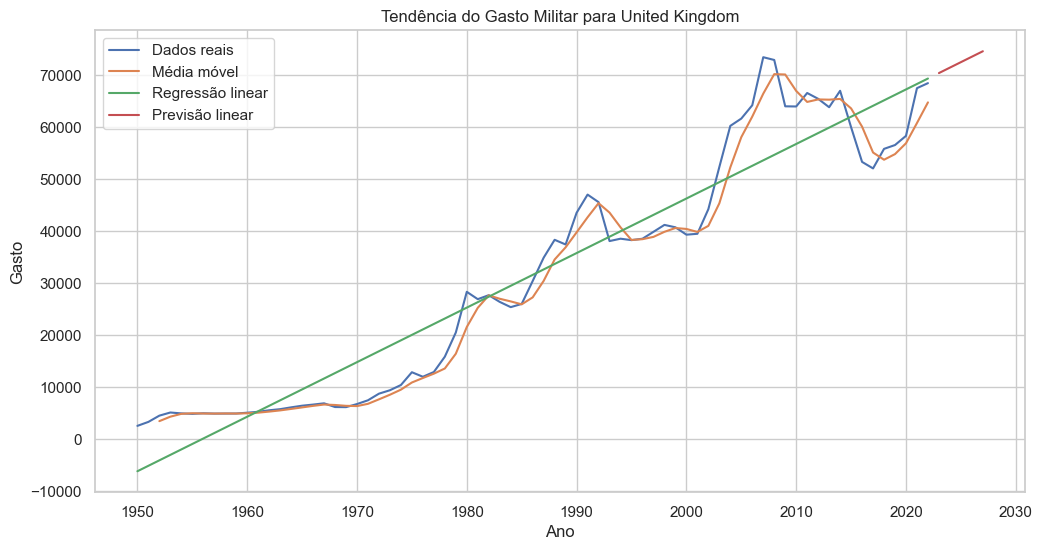

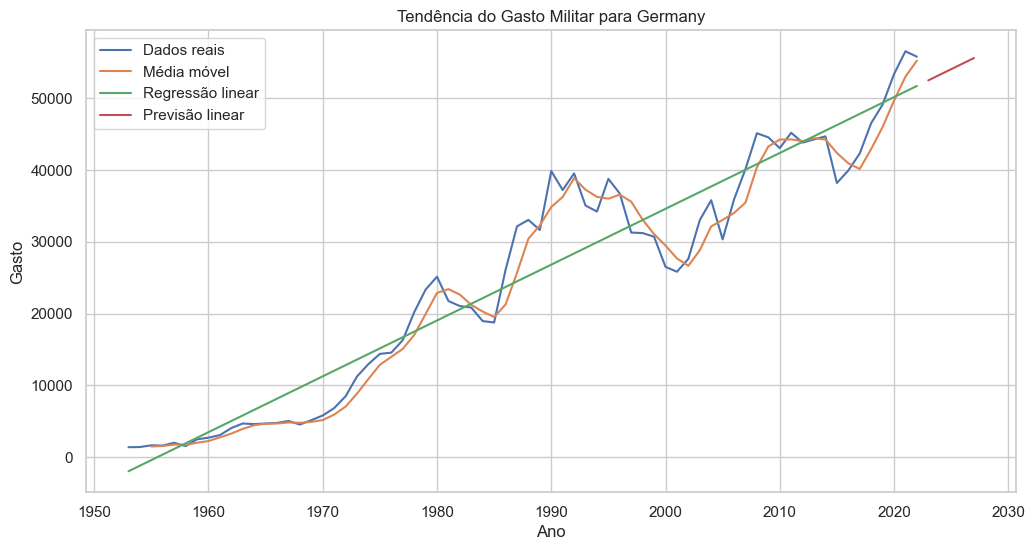

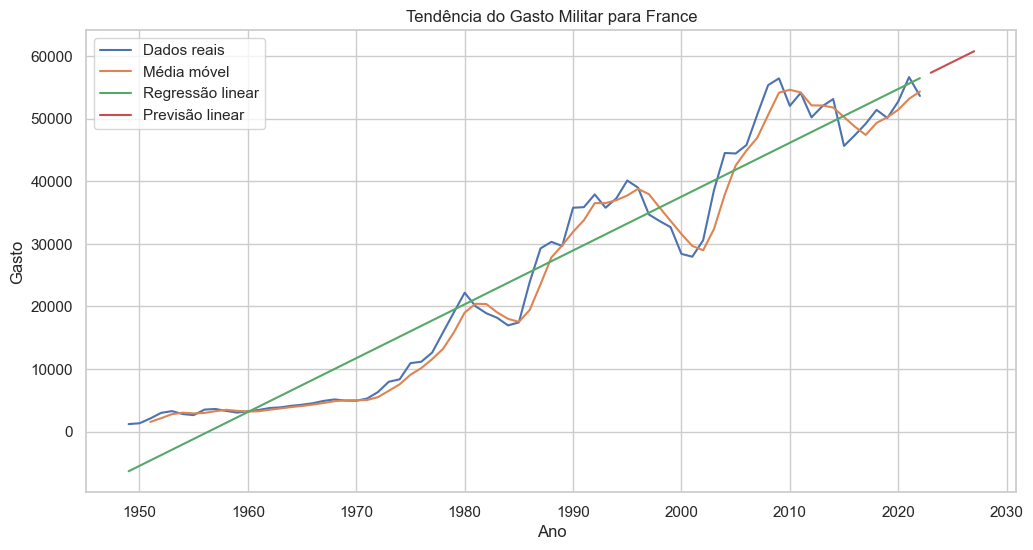

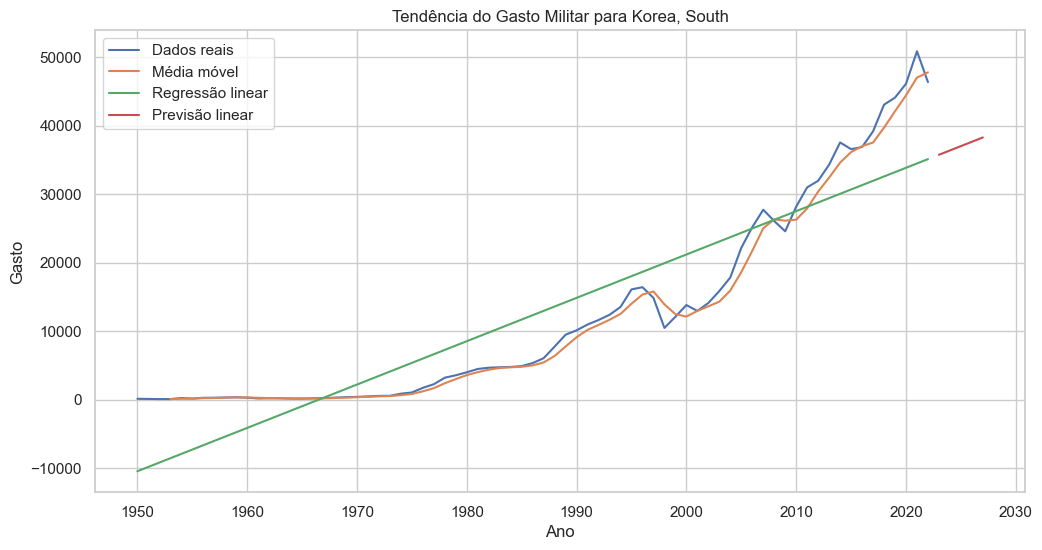

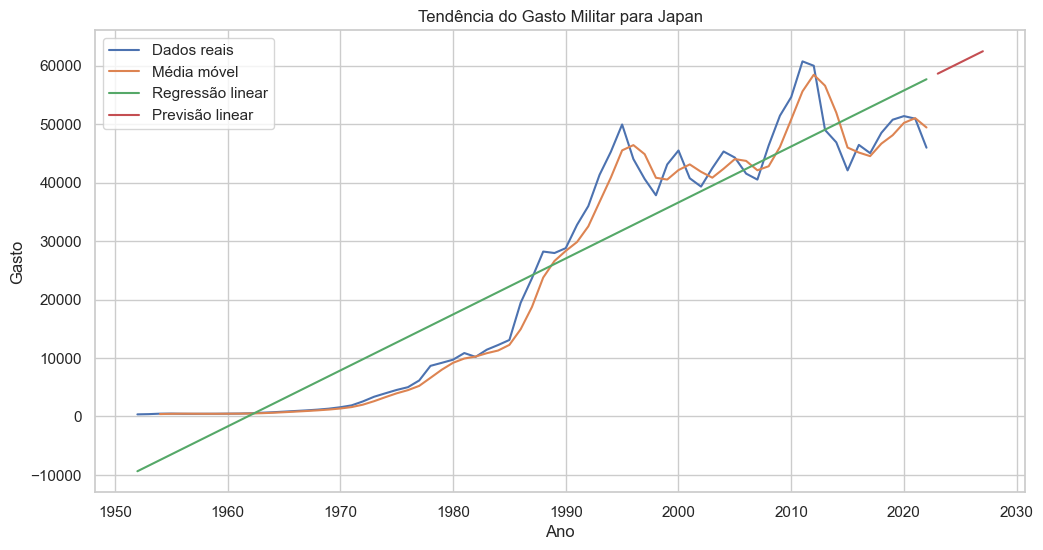

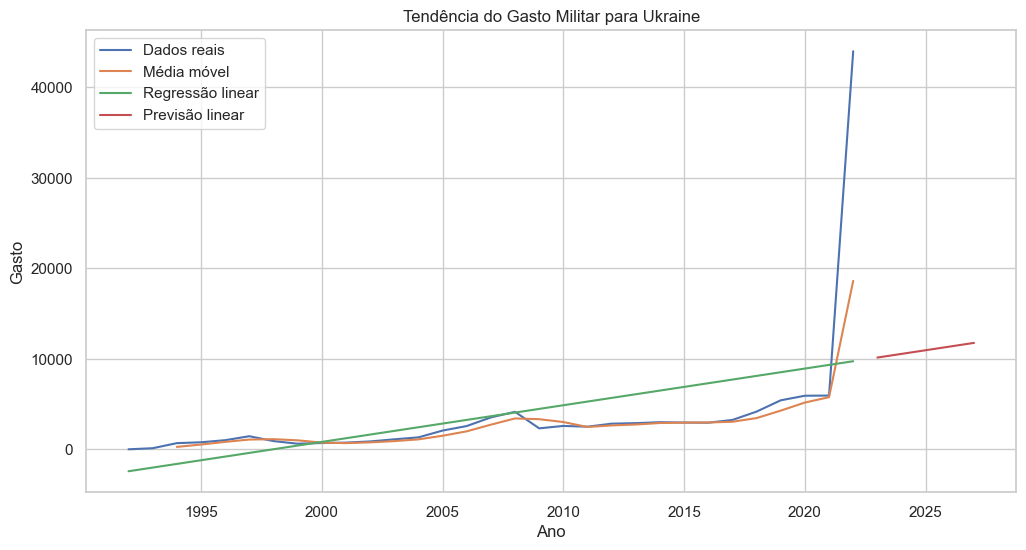

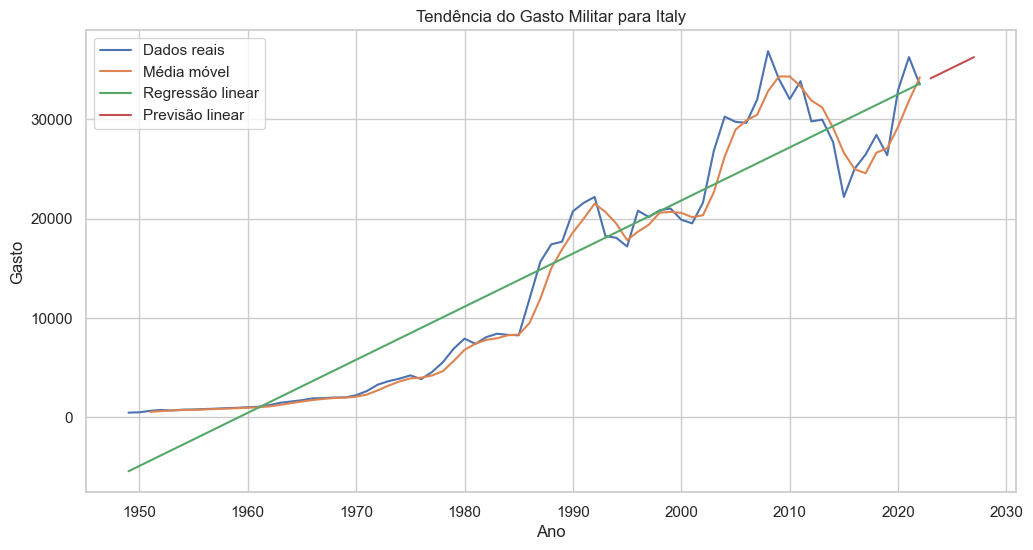

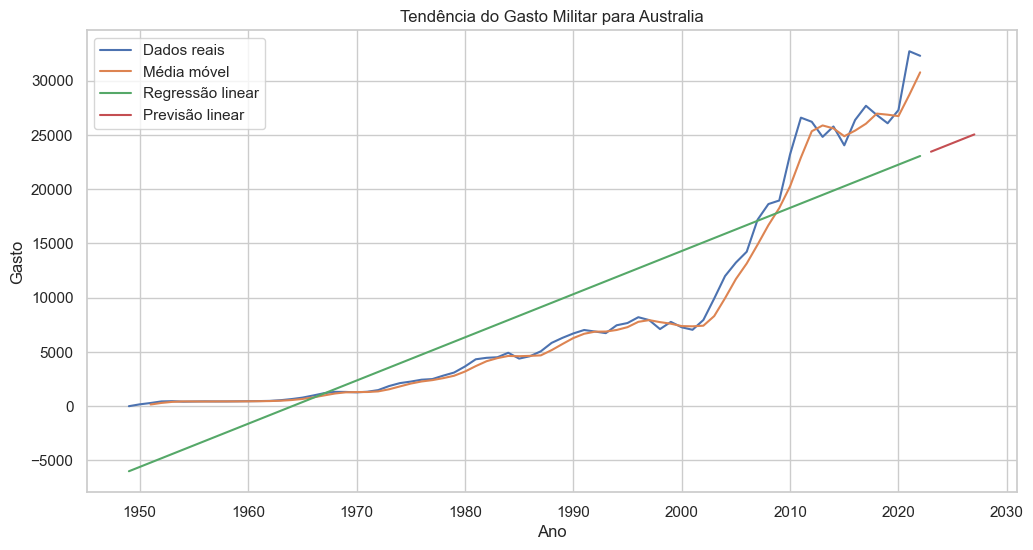

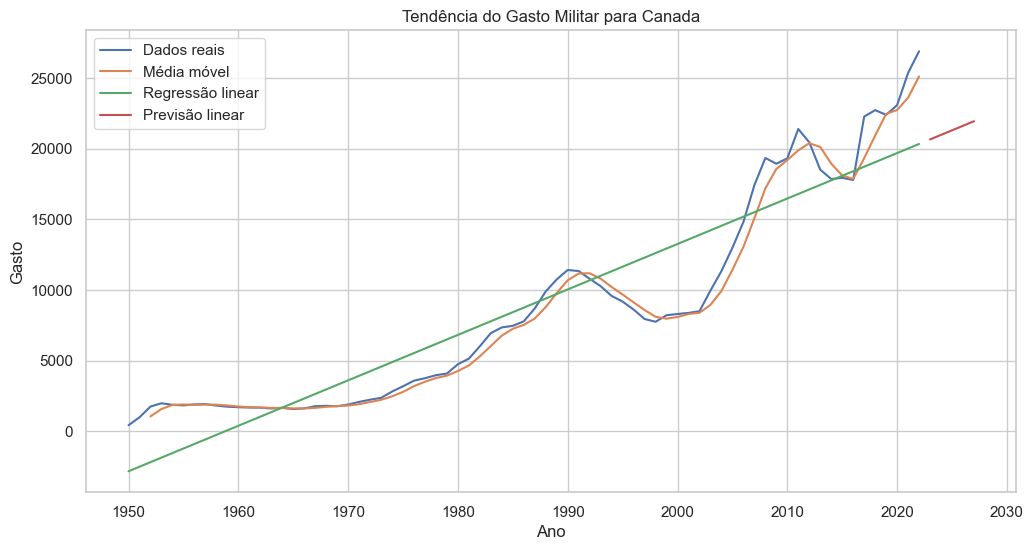

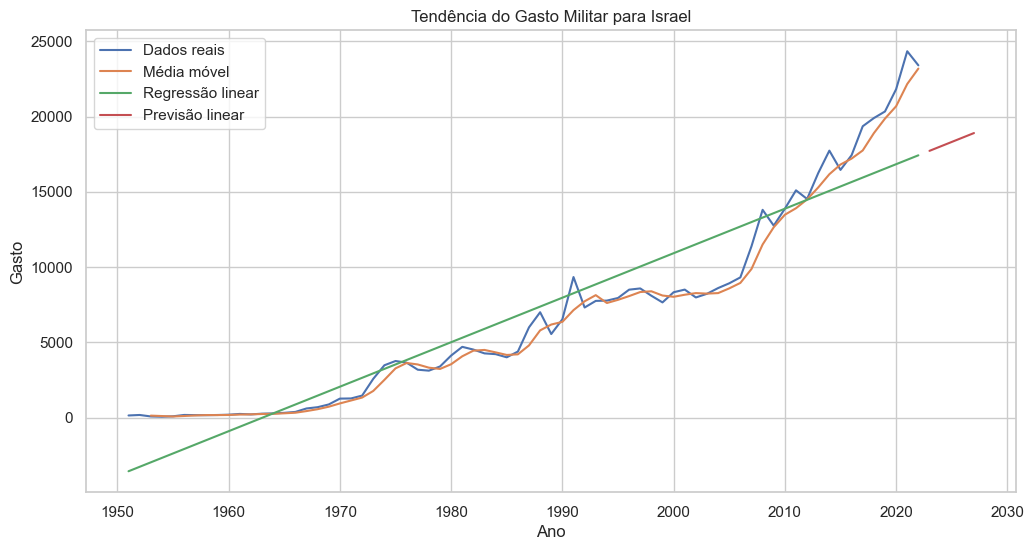

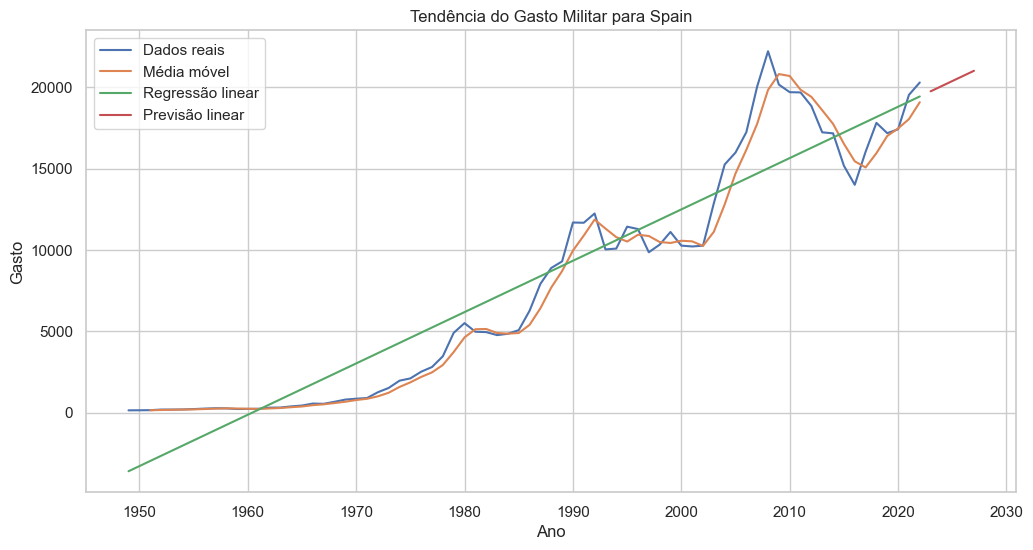

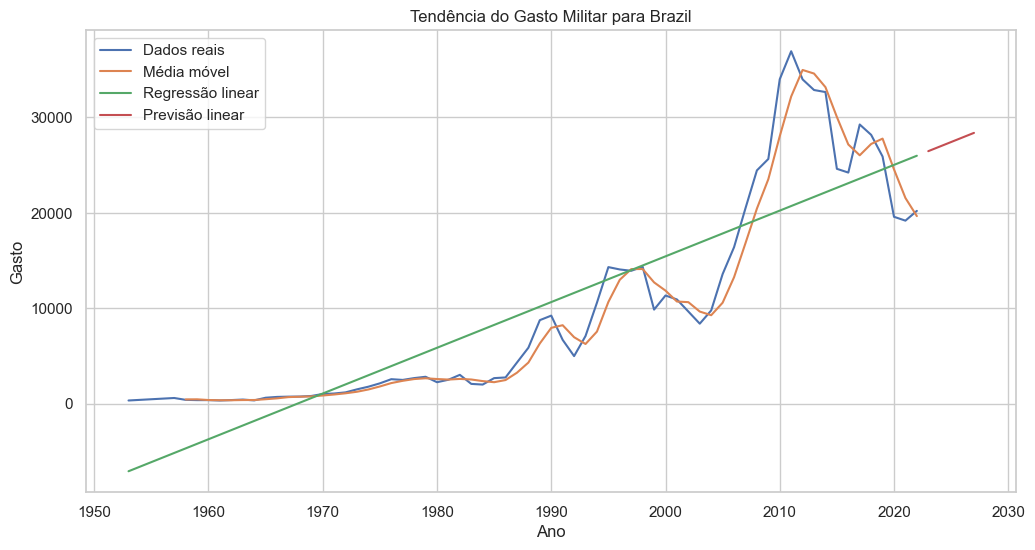

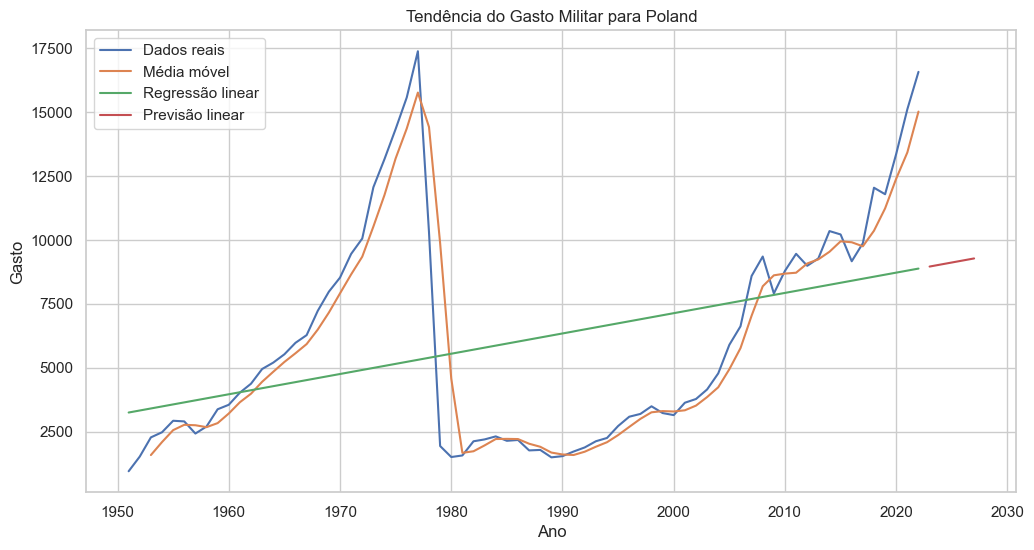

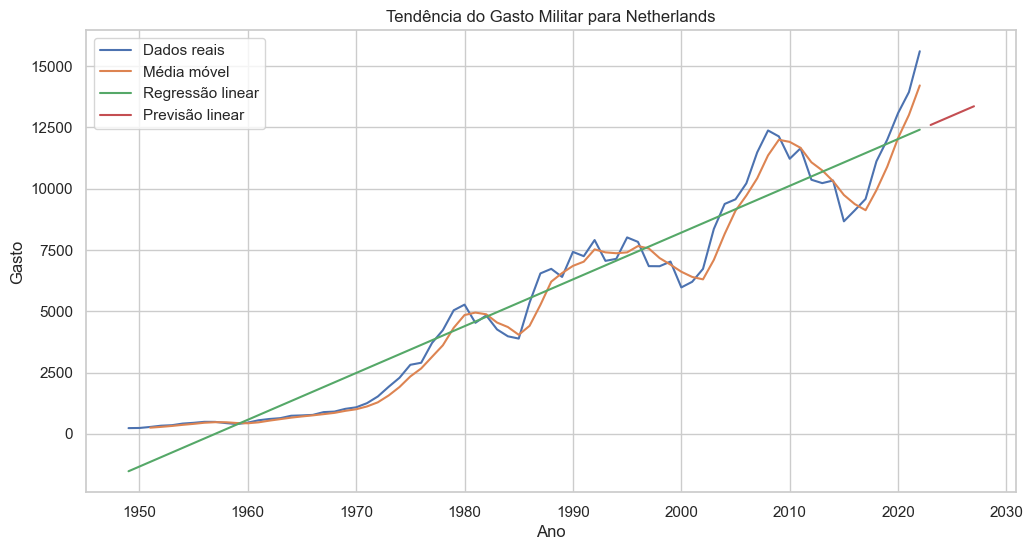

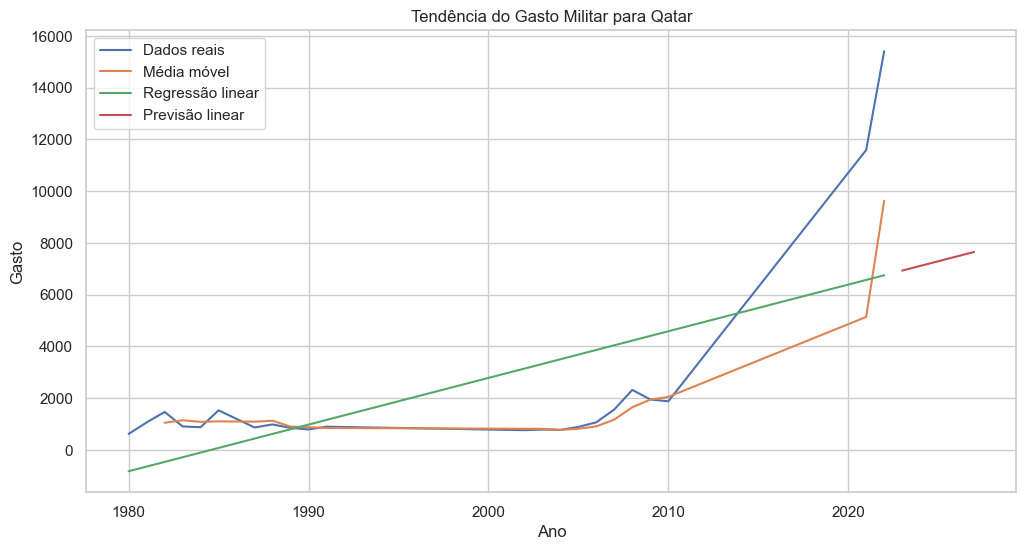

In [22]:
for pais in paises_top:
    dados_pais, anos_futuros, previsoes_linear = prever_tendencia(pais, df)
    if dados_pais is not None:
        # Plotando os dados reais e as previsões de tendência
        plt.figure(figsize=(12, 6))
        plt.plot(dados_pais['ano'], dados_pais['gasto'], label='Dados reais')
        plt.plot(dados_pais['ano'], dados_pais['media_movel'], label='Média móvel')
        plt.plot(dados_pais['ano'], dados_pais['regressao_linear'], label='Regressão linear')
        plt.plot(anos_futuros, previsoes_linear, label='Previsão linear')
        plt.title('Tendência do Gasto Militar para ' + pais)
        plt.xlabel('Ano')
        plt.ylabel('Gasto')
        plt.legend()
        plt.show()

In [23]:
df

,pais,ano,gasto
0,Africa,1949,NaN
1,North Africa,1949,NaN
2,Algeria,1949,NaN
3,Libya,1949,NaN
4,Morocco,1949,NaN
...,...,...,...
14203,Syria,2022,NaN
14204,Türkiye,2022,10644.578905
14205,United Arab Emirates,2022,NaN
14206,"Yemen, North",2022,NaN
